# **KHÁM PHÁ VÀ TIỀN XỬ LÝ DỮ LIỆU**

---

# I. THU THẬP DỮ LIỆU

- Chủ đề dữ liệu: ...
- Nguồn dữ liệu: Dữ liệu được download từ trang web `Kaggle` dưới dạng file csv
- Link dataset: [Student Performance Factors](https://www.kaggle.com/datasets/lainguyn123/student-performance-factors)

# II. KHÁM PHÁ DỮ LIỆU

Import các thư viện cần thiết

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

Đọc dữ liệu từ đường dẫn gg drive

In [3]:
with open('../Datasets/solar_weather_link.txt') as f:
    link = f.readline()

FILE_ID = link.split("/d/")[1].split("/view")[0]

In [4]:
url = f'https://drive.google.com/uc?id={FILE_ID}&export=download'
df = pd.read_csv(url)
df.head()

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.0,4,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.0,4,1,1


### 1. Dữ liệu có bao nhiêu dòng, cột? 

In [5]:
df.shape

(196776, 17)

### 2. Thông tin về các dòng dữ liệu

#### 2.1 Ý nghĩa từng dòng dữ liệu

- Mỗi dòng là thông tin về ... 

- Không có dòng nào có ý nghĩa khác với các dòng còn lại.

#### 2.2 Kiểm tra các dòng dữ liệu trùng lặp

In [6]:
n_duplicate = df.duplicated().sum()
print(f"Số dòng dữ liệu bị trùng lặp: {n_duplicate}")

Số dòng dữ liệu bị trùng lặp: 0


In [7]:
if n_duplicate > 0:
    df.drop_duplicates()

df.shape

(196776, 17)

Qua kiểm tra, ta thấy dữ liệu không bị trùng lặp. Ta tiến hành bước tiếp theo. 

### 3. Thông tin về các cột dữ liệu

Dữ liệu có các cột sau

In [8]:
df.columns

Index(['Time', 'Energy delta[Wh]', 'GHI', 'temp', 'pressure', 'humidity',
       'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all', 'isSun',
       'sunlightTime', 'dayLength', 'SunlightTime/daylength', 'weather_type',
       'hour', 'month'],
      dtype='object')

#### 3.1 Ý nghĩa của các cột dữ liệu

Theo mô tả dữ liệu trên Kaggle, mỗi cột có ý nghĩa như sau:
|Tên cột|Ý nghĩa|
|-------|-------|
| Hours_Studied| Số giờ dành cho việc học mỗi tuần|
| Attendance| Tỷ lệ phần trăm lớp học đã tham dự|
| Parental_Involvement| Mức độ tham gia của phụ huynh vào việc học tập của học sinh|
| Access_to_Resource| Khả năng tiếp cận tới các nguồn lực giáo dục|
| Extracurricular_Activities| Câu hỏi về việc có tham gia các hoạt động ngoại khóa hay không|
| Sleep_Hours| Số giờ ngủ trung bình mỗi đêm|
| Previous_Scores| Điểm trung bình của các kỳ thi trước|
| Motivation_Level| Mức độ động lực của học sinh|
| Internet_Access| Câu hỏi về khả năng có thể truy cập internet hay không|
| Tutoring_Session| Số buổi học thêm tham dự mỗi tháng|
| Family_Income| Mức thu nhập gia đình|
| Teacher_Quality| Chất lượng giáo viên|
| School_Type| Loại trường học đã theo học|
| Peer_Influence| Ảnh hưởng của bạn bè đến kết quả học tập|
| Physical_Activity| Số giờ hoạt động thể chất trung bình mỗi tuần|
| Learning_Disabilities| Câu hỏi về có khó khăn nào trong học tập hay không|
| Parental_Education_Level| Trình độ học vấn của cha mẹ|
| Distance_from_Home| Khoảng cách từ nhà đến trường |
| Gender| Giới tính của đối tượng khảo sát|
| Exam_Score| Điểm thi cuối kỳ|

#### 3.2 Kiểm tra kiểu dữ liệu của mỗi cột 

- Kiểu dữ liệu hiện tại của các cột

In [9]:
column_types = df.dtypes
column_types

Time                       object
Energy delta[Wh]            int64
GHI                       float64
temp                      float64
pressure                    int64
humidity                    int64
wind_speed                float64
rain_1h                   float64
snow_1h                   float64
clouds_all                  int64
isSun                       int64
sunlightTime                int64
dayLength                   int64
SunlightTime/daylength    float64
weather_type                int64
hour                        int64
month                       int64
dtype: object

- Nhận xét: 
    + Trong dataframe, cột **isSun** và cột **weather_type** có kiểu int64, tuy nhiên ý nghĩa của 2 cột này mà nhóm đã tìm hiểu thì 2 cột này nên có kiểu phân loại, với cột **isSun** là `boolean` còn cột **weather_type** là `category`. 
    
    + Mặt khác, cột **Time** có dữ liệu thời gian nhưng hiện tại nó đang có kiểu object. Để chuẩn hóa nhóm đổi kiểu dữ liệu về `time`.

    + Cột **month** và **hour** là thông tin về giờ trong ngày và tháng trong năm khảo sát ? ... nhóm chuyển về kiểu `category`.

In [12]:
df['isSun'].value_counts(normalize = False, sort=True, ascending = True)
# đổi kiểu dữ liệu của isSun

0     94460
1    102316
Name: isSun, dtype: int64

In [13]:
df['weather_type'].value_counts(normalize = False, sort=True, ascending = True)
# đổi kiểu dữ liệu của weather_type

11    14304
9     14400
12    14400
10    14784
2     16032
1     16992
6     17184
4     17280
8     17832
3     17856
5     17856
7     17856
Name: month, dtype: int64

In [ ]:
# your code here =))))))

#### 3.3 Sự phân bố dữ liệu của các cột có kiểu định lượng

Các cột có kiểu dữ liệu định lượng

In [18]:
numerical_columns = df.select_dtypes(include=['int64', 'float64', 'float32']).columns.tolist()
print('Numberical columns: ')
for col_name in numerical_columns:
    print(col_name)

Numberical columns: 
Energy delta[Wh]
GHI
temp
pressure
humidity
wind_speed
rain_1h
snow_1h
clouds_all
isSun
sunlightTime
dayLength
SunlightTime/daylength
weather_type
hour
month


- Sự phân bố dữ liệu của các cột\
  Từ mô tả của dữ liệu và đánh giá sơ bộ, nhóm nhận thấy rằng trong các cột này thì dữ liệu của các cột ... là liên tục; còn dữ liệu các cột ... là rời rạc. Vì vậy nhóm sẽ sử dụng 2 loại biểu đồ là `histogram` cho cột có kiểu dữ liệu liên tục và `bar chart` cho kiểu dữ liệu rời rạc để trực quan hóa phân bố giá trị của các cột này.  

In [9]:
# Danh sách các cột tương ứng với histogram và bar plot
# histogram_columns = ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Exam_Score']
# bar_columns = ['Tutoring_Sessions', 'Physical_Activity', 'Sleep_Hours']

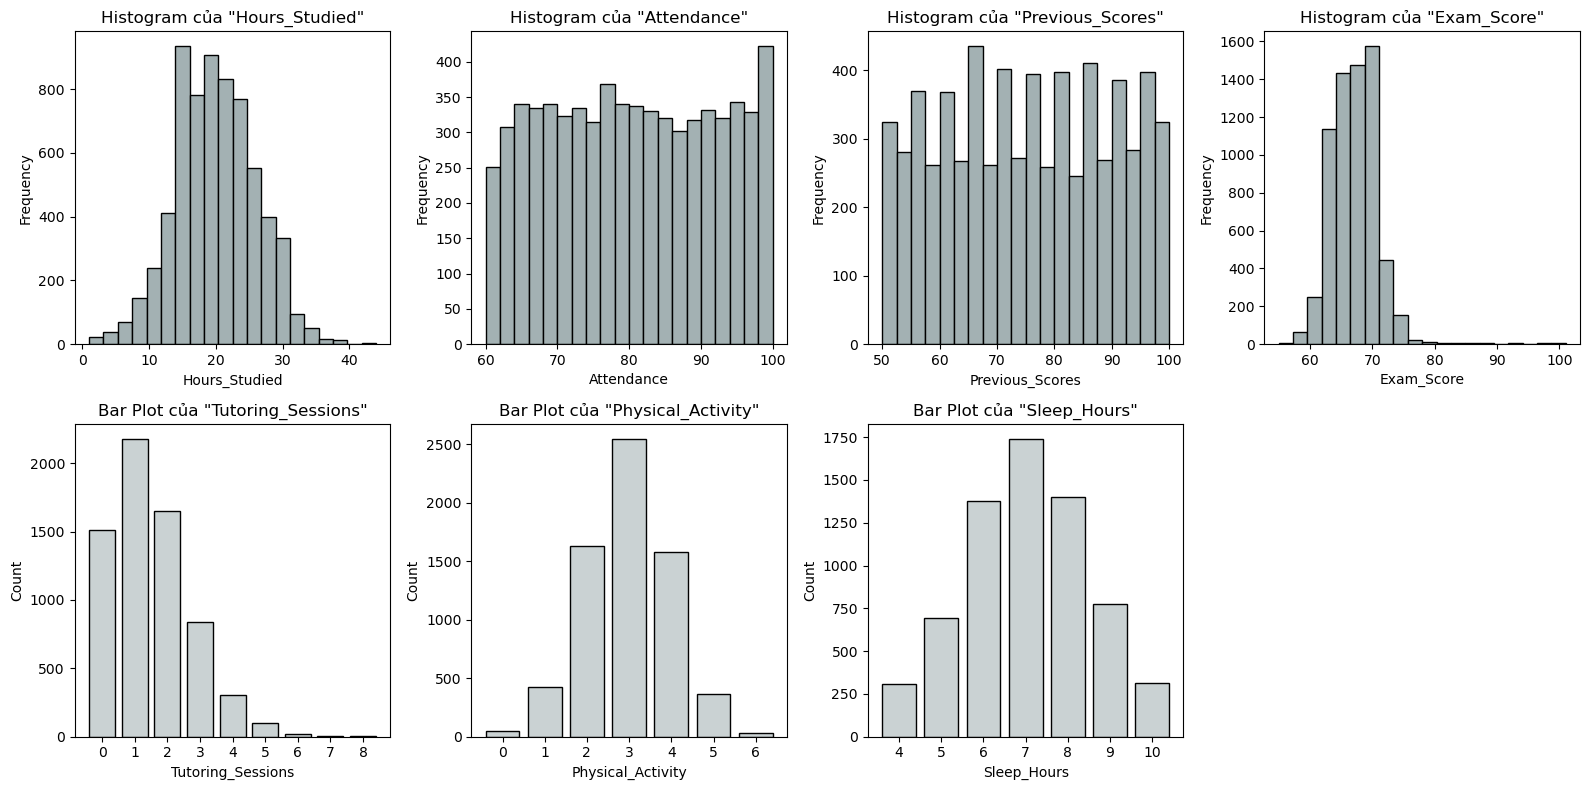

In [10]:
# Vẽ biểu đồ phân bố giá trị của các cột
# numerical_fig, numerical_axes = plt.subplots(2, 4, figsize=(16, 8))

# for i, col_name in enumerate(histogram_columns):
#     ax = numerical_axes[i // 4, i % 4]  
#     ax.hist(df[col_name].dropna(), bins=20, color = '#A3B1B3', edgecolor='black')
#     ax.set_title(f'Histogram của "{col_name}"')
#     ax.set_xlabel(col_name)
#     ax.set_ylabel('Frequency')

# for i, col_name in enumerate(bar_columns, start=4):  
#     ax = numerical_axes[i // 4, i % 4]  
#     value_counts = df[col_name].value_counts().sort_index()
#     ax.bar(value_counts.index, value_counts.values, color='#CAD2D3', edgecolor='black')
#     ax.set_title(f'Bar Plot của "{col_name}"')
#     ax.set_xlabel(col_name)
#     ax.set_ylabel('Count')
#     ax.set_xticks(value_counts.index) # Đặt giới hạn trục x nếu cần để phù hợp với tất cả các giá trị

# numerical_axes[1, 3].axis('off')

# plt.tight_layout()
# plt.show()

##### 3.3.1 Tỉ lệ phần trăm các giá trị bị thiếu trong mỗi cột

In [19]:
for col_name in numerical_columns:
    print(f'{col_name}: {df[col_name].isnull().mean()*100}%')

Energy delta[Wh]: 0.0%
GHI: 0.0%
temp: 0.0%
pressure: 0.0%
humidity: 0.0%
wind_speed: 0.0%
rain_1h: 0.0%
snow_1h: 0.0%
clouds_all: 0.0%
isSun: 0.0%
sunlightTime: 0.0%
dayLength: 0.0%
SunlightTime/daylength: 0.0%
weather_type: 0.0%
hour: 0.0%
month: 0.0%


- Nhận xét: Dữ liệu trong các cột dữ liệu dạng định lượng (numerical columns) của dataframe không có bất kỳ giá trị nào bị thiếu. 

##### 3.3.2 Tính toán các giá trị thống kê 

In [21]:
numerical_statistic = df.describe()
numerical_statistic

,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
count,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000,196776.000000
mean,573.008228,32.596538,9.790521,1015.292780,79.810566,3.937746,0.066035,0.007148,65.974387,0.519962,211.721094,748.644347,0.265187,3.198398,11.498902,6.298329
std,1044.824047,52.172018,7.995428,9.585773,15.604459,1.821694,0.278913,0.069710,36.628593,0.499603,273.902186,194.870208,0.329023,1.289939,6.921887,3.376066
min,0.000000,0.000000,-16.600000,977.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,450.000000,0.000000,1.000000,0.000000,1.000000
25%,0.000000,0.000000,3.600000,1010.000000,70.000000,2.600000,0.000000,0.000000,34.000000,0.000000,0.000000,570.000000,0.000000,2.000000,5.000000,3.000000
50%,0.000000,1.600000,9.300000,1016.000000,84.000000,3.700000,0.000000,0.000000,82.000000,1.000000,30.000000,765.000000,0.050000,4.000000,11.000000,6.000000
75%,577.000000,46.800000,15.700000,1021.000000,92.000000,5.000000,0.000000,0.000000,100.000000,1.000000,390.000000,930.000000,0.530000,4.000000,17.000000,9.000000
max,5020.000000,229.200000,35.800000,1047.000000,100.000000,14.300000,8.090000,2.820000,100.000000,1.000000,1020.000000,1020.000000,1.000000,5.000000,23.000000,12.000000


- Nhận xét: ...

In [22]:
# your code here

#### 3.4 Sự phân bố giá trị của các cột có kiểu định tính

- Các cột có kiểu dữ liệu định tính

In [23]:
categorical_columns = df.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()
print('Categorical columns: ')
for col_name in categorical_columns:
    print(col_name)

Categorical columns: 
Time


##### 3.4.1 Số giá trị phân biệt của mỗi cột

In [17]:
# Hàm tính toán sự phân bố các giá trị
def compute_distribution(dataframe, column):
    value_counts = dataframe[column].value_counts(dropna=False) 
    db = {}
    for value, count in value_counts.items():
        db[value] = count
    
    return db

In [18]:
# Tìm phân bố giá trị
cat_distribution = {}

for column in categorical_columns:
    cat_distribution[column] = compute_distribution(df, column)

In [19]:
# Chuyển thành dạng bảng
# Tạo danh sách để lưu dữ liệu cho DataFrame
data = {
    "Column": [],
    "Distinct_Values": [],
    "Value_Distribution": []
}

# Thêm dữ liệu vào danh sách
for column, distribution in cat_distribution.items():
    different_values = len(set(df[column]))
    data["Column"].append(column)
    data["Distinct_Values"].append(different_values)
    data["Value_Distribution"].append(distribution)

# Tạo DataFrame từ dữ liệu
distribution_df = pd.DataFrame(data)

# In ra DataFrame
distribution_df

,Column,Distinct_Values,Value_Distribution
0,Parental_Involvement,3,"{'Medium': 3362, 'High': 1908, 'Low': 1336}"
1,Access_to_Resources,3,"{'Medium': 3318, 'High': 1975, 'Low': 1313}"
2,Extracurricular_Activities,2,"{'Yes': 3937, 'No': 2669}"
3,Motivation_Level,3,"{'Medium': 3351, 'Low': 1936, 'High': 1319}"
4,Internet_Access,2,"{'Yes': 6108, 'No': 498}"
5,Family_Income,3,"{'Low': 2672, 'Medium': 2666, 'High': 1268}"
6,Teacher_Quality,4,"{'Medium': 3925, 'High': 1946, 'Low': 657, nan..."
7,School_Type,2,"{'Public': 4597, 'Private': 2009}"
8,Peer_Influence,3,"{'Positive': 2637, 'Neutral': 2592, 'Negative'..."
9,Learning_Disabilities,2,"{'No': 5911, 'Yes': 695}"


##### 3.4.2 Tỉ lệ phần trăm các giá trị bị thiếu trong mỗi cột

In [20]:
for col_name in categorical_columns:
    missing_rate = df[col_name].isnull().mean() * 100
    print(f'{col_name}: {missing_rate:.2f}%')

Parental_Involvement: 0.00%
Access_to_Resources: 0.00%
Extracurricular_Activities: 0.00%
Motivation_Level: 0.00%
Internet_Access: 0.00%
Family_Income: 0.00%
Teacher_Quality: 1.18%
School_Type: 0.00%
Peer_Influence: 0.00%
Learning_Disabilities: 0.00%
Parental_Education_Level: 1.36%
Distance_from_Home: 1.01%
Gender: 0.00%


- Nhận xét: 
    - Trong quá trình phân tích dữ liệu, đã phát hiện một số cột phân loại có giá trị bị thiếu. Cụ thể, các cột **Teacher_Quality** (1.18%), **Parental_Education_Level** (1.36%), và **Distance_from_Home** (1.01%)
    - Để khắc phục vấn đề này, chúng em quyết định xóa các hàng có giá trị thiếu. Điều này sẽ giúp tăng cường độ chính xác trong các phân tích và mô hình hóa tiếp theo, đồng thời đảm bảo rằng các kết quả thu được là đáng tin cậy.


In [21]:
df = df.dropna()

for column in categorical_columns:
    cat_distribution[column] = compute_distribution(df, column) 

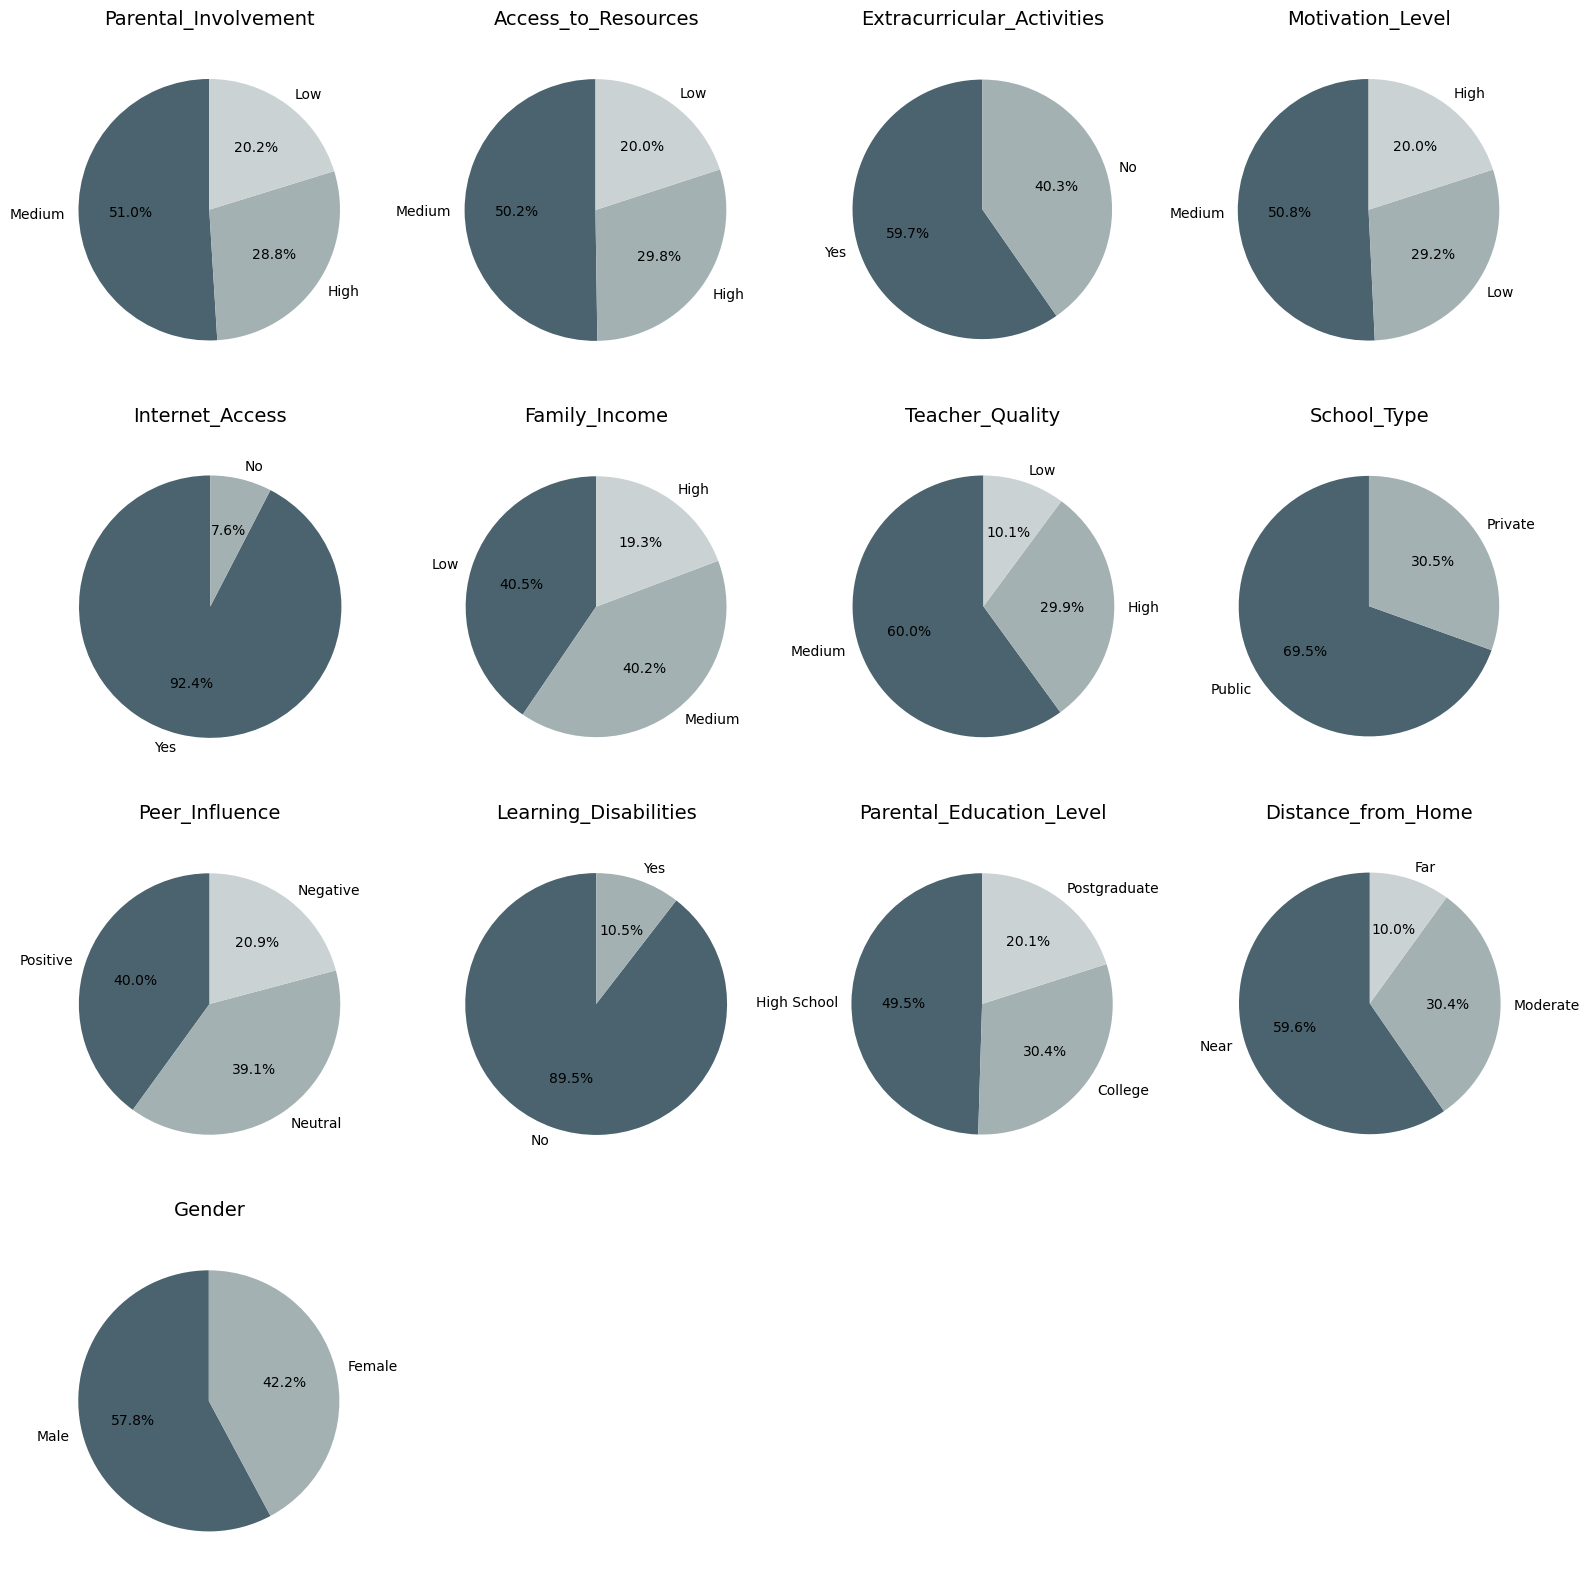

In [22]:
# Vẽ biểu đồ phân bố giá trị của các cột
numerical_fig, numerical_axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
numerical_axes = numerical_axes.flatten()

plot_count = 0

colors = ['#4A636E', '#A3B1B3','#CAD2D3', '#2B4D60', '#7D7D7D']

for column, distribution in cat_distribution.items():
    if plot_count >= 16:
        break

    labels = list(distribution.keys())
    counts = list(distribution.values())

    numerical_axes[plot_count].pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
    numerical_axes[plot_count].axis('equal') 
    numerical_axes[plot_count].set_title(f'{column}', fontsize=14)

    plot_count += 1

for i in range(plot_count, 16):
    numerical_fig.delaxes(numerical_axes[i])

plt.tight_layout()
plt.show()

Sau các bước tiền xử lý, ta thực hiện lưu dataframe này vào 1 file mới và thực hiện các trực quan hóa trên file này.

In [23]:
#df.to_csv('../Data/StudentPerformanceFactors_clean.csv', index=False)